The movies dataset -> https://www.kaggle.com/rounakbanik/the-movies-dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 99% 225M/228M [00:16<00:00, 15.1MB/s]
100% 228M/228M [00:16<00:00, 14.1MB/s]


In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!unzip "/content/the-movies-dataset.zip" -d "/content/"

Archive:  /content/the-movies-dataset.zip
  inflating: /content/credits.csv    
  inflating: /content/keywords.csv   
  inflating: /content/links.csv      
  inflating: /content/links_small.csv  
  inflating: /content/movies_metadata.csv  
  inflating: /content/ratings.csv    
  inflating: /content/ratings_small.csv  


In [ ]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = Path('/content/')
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'

In [ ]:
raw_ratings_df = pd.read_csv(DATA_DIR / 'ratings_small.csv')
raw_movies_df = pd.read_csv(DATA_DIR / 'movies_metadata.csv')
display(raw_ratings_df.sample(5))
raw_movies_df.sample(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,userId,movieId,rating,timestamp
48517,355,2232,4.0,1130103853
12508,78,4025,5.0,1327288563
81094,550,2278,4.0,943373068
25189,185,316,4.0,1003523646
82594,562,4306,4.0,1167426649


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5240,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,29318,tt0058007,en,Devil Doll,An evil hyponotist/ventriloquist plots to gain...,0.670951,/rtanUJSnN3KNCfUqWoRCLYpWAye.jpg,"[{'name': 'Galaworldfilm Productions', 'id': 1...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1964-09-01,0.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Is it flesh or wood? Man or monster? Alive or ...,Devil Doll,False,4.0,10.0
41663,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://www.sfi.se/en-GB/Swedish-film-database/...,301849,tt3265506,sv,Flugparken,Blowfly Park is a psychological thriller which...,0.774073,/tijE6zzzXeetSJFUtIi8qLTgsPr.jpg,[],"[{'iso_3166_1': 'SE', 'name': 'Sweden'}]",2014-11-28,0.0,96.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,Blowfly Park,False,5.0,2.0
31628,False,NaN,100000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://thegallowsmovie.com/,299245,tt2309260,en,The Gallows,20 years after a horrific accident during a sm...,7.51505,/rCcmr3PqKohsjl7SlsTRZF0WcUF.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-07-10,42664410.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every School Has Its Spirit,The Gallows,False,4.9,370.0
43989,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,89070,tt2156825,ru,Камень,When a 7-year-old son of the well-known busine...,0.644585,/A5EYOzq6s0RrRexKkF0mXqP1Aah.jpg,"[{'name': 'Slava Film', 'id': 18061}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2012-01-19,0.0,90.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Stone,False,4.5,7.0
1140,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10769, '...",NaN,54405,tt0102014,en,Hear My Song,Singer Josef Locke fled to Ireland 25 years ag...,0.003977,/sg0SmGCtFcfWUWnVsOdhDRjCItM.jpg,"[{'name': 'Miramax Films', 'id': 14}]",[],1991-12-27,0.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's definitely magic in the air,Hear My Song,False,4.1,4.0


## Column types

In [ ]:
raw_ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
raw_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- Timestamp is the time when the ... so we need to convert it to datetime

## Missing Values

In [ ]:
raw_ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Distribution

### Ratings

In [ ]:
raw_ratings_df.rating.describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


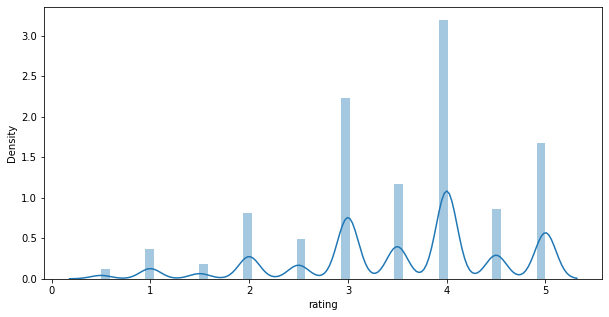

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(raw_ratings_df.rating)

## Tasks

Use dataframe raw_movies_df and raw_rating_df

## raw_movie_df dataset

In [ ]:
raw_movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# Use "Id" and "title" column of raw_movie_df dataset
raw_movies_df_edit = raw_movies_df[['id', 'title']]
raw_movies_df_edit.head(5)

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [ ]:
raw_movies_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45466 non-null  object
 1   title   45460 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [ ]:
# change the datatype of id to int
raw_movies_df_edit['id'] = raw_movies_df_edit.id.astype(int)
raw_movies_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45430 non-null  int64 
 1   title   45430 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# drop row that contain null value
raw_movies_df_edit = raw_movies_df_edit.dropna(how='any',axis=0) 
raw_movies_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45430 non-null  int64 
 1   title   45430 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
# Check Duplicate value
raw_movies_df_edit.duplicated(['id', 'title']).sum()

0

In [ ]:
# Drop duplicate value
raw_movies_df_edit.drop_duplicates(['id'], inplace=True)
raw_movies_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45430 non-null  int64 
 1   title   45430 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


## raw_ratings_df dataset

In [ ]:
raw_ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
# Use 'userId', 'movieId', 'rating' columns
raw_ratings_df_edit = raw_ratings_df[['userId', 'movieId', 'rating']]
raw_ratings_df_edit.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [ ]:
# Check any value is missing or not
raw_ratings_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [ ]:
# Check Duplicate value
raw_ratings_df_edit.duplicated(['userId', 'movieId', 'rating']).sum()

0

## Merge two dataframe and save in new dataframe

In [ ]:
ratings_df = pd.merge(raw_ratings_df_edit, raw_movies_df_edit, left_on='movieId', right_on='id') 
ratings_df.head()

,userId,movieId,rating,id,title
0,1,1371,2.5,1371,Rocky III
1,4,1371,4.0,1371,Rocky III
2,7,1371,3.0,1371,Rocky III
3,19,1371,4.0,1371,Rocky III
4,21,1371,3.0,1371,Rocky III


In [ ]:
# Drop duplicate column
ratings_df.drop(['id'], axis=1, inplace=True) 
ratings_df.head()

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44989 entries, 0 to 44988
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   44989 non-null  int64  
 1   movieId  44989 non-null  int64  
 2   rating   44989 non-null  float64
 3   title    44989 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
# Check Duplicate value
ratings_df.duplicated(['userId', 'movieId', 'rating', 'title']).sum()

0